In [1]:
import sys
sys.path.append("..")

In [2]:
import dataset
import matplotlib.pyplot as plt
import midi
import numpy as np

In [3]:
print(f"{midi.NUM_MIDI_KEYS=}({midi.MIN_MIDI_KEY} ~ {midi.MAX_MIDI_KEY})")
print(f"{midi.NUM_PITCH_CLASSES=}")

midi.NUM_MIDI_KEYS=128(0 ~ 127)
midi.NUM_PITCH_CLASSES=12


In [4]:
# correct case
note1 = midi.MIDIUnit.new_note(1, 12.3)
note2 = midi.MIDIUnit.new_note(10, 1.23)
note3 = midi.MIDIUnit.new_note(100, 123)

print(note1, note1.is_note())        # Note(1, 12.30), True
print(midi.MIDIRest, midi.MIDIRest.is_note())  # Rest, False

Note(1, 12.30) True
Rest False


In [5]:
# error
error = midi.MIDIUnit.new_note(1, -12.3)  # throw ValueError

ValueError: (midi_key=1, velocity=-12.30)

In [6]:
sequence1 = midi.MIDIUnitSequence()
sequence1.append(note1)
sequence1.append(note2)
sequence1.append(note3)

sequence2 = midi.MIDIUnitSequence()
sequence2.append(midi.MIDIRest)

sequence3 = midi.MIDIUnitSequence()
sequence3.append(note3)
sequence3.append(note2)
sequence3.append(note1)

print(sequence1)  # [Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]

[Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]


In [7]:
sequence_list = midi.MIDIUnitSequenceList()
sequence_list.append(sequence1)
sequence_list.append(sequence2)
sequence_list.append(sequence3)

# [[Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)], [Rest], [Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]]
print(sequence_list)

#  [[Rest], [Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]]
print(sequence_list[1:])

[[Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)], [Rest], [Note(100, 123.00), Note(10, 1.23), Note(1, 12.30)]]
[[Rest], [Note(100, 123.00), Note(10, 1.23), Note(1, 12.30)]]


In [8]:
generator = dataset.new_generator(root="../../dataset/newbie-dataset/", shuffle=False, note_scale=0.90)

In [9]:
def display(score, perf, head, tail) -> None:
    plt.figure(figsize=(16, 9))
    
    plt.subplot(2, 1, 1)
    plt.title("Score")
    plt.imshow(score, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
    plt.ylabel("MIDI Key")
    plt.xlabel("Frame")
    ylim, _ = score.shape
    plt.ylim([0, ylim])


    plt.subplot(2, 1, 2)
    plt.title("Performance")
    plt.imshow(perf, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
    plt.ylabel("MIDI Key")
    plt.xlabel("Frame")
    ylim, _ = perf.shape
    plt.vlines(head, 0, ylim, label="head")
    plt.vlines(tail, 0, ylim, label="tail")
    plt.legend()
    plt.ylim([0, ylim])

    plt.show()

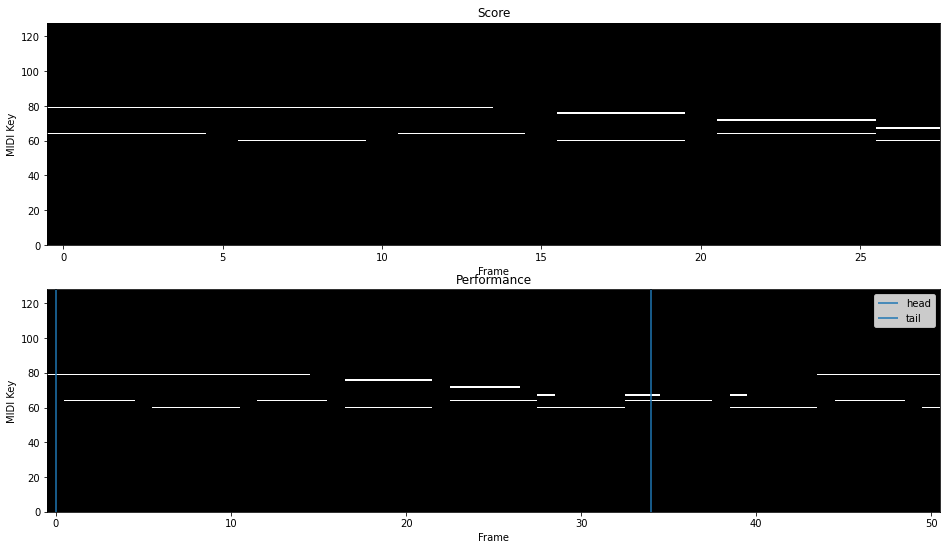

In [10]:
score, perf, (head, tail) = next(generator)
display(score, perf, head, tail)

In [11]:
score_sequence_list = midi.MIDIUnitSequenceList.from_midi_matrix(score)
print(score_sequence_list)

[[Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00)], [Rest], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Rest], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1.00), Note(67, 1.00)]]


In [12]:
score2 = score_sequence_list.to_midi_matrix()
np.sum(score - score2)

0.0

In [13]:
print(score_sequence_list.pitch_histogram)
print(score_sequence_list.repr_unit_sequence)

[0.30612245 0.         0.         0.         0.36734694 0.
 0.         0.3265306  0.         0.         0.         0.        ]
[Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(79, 1.00), Note(64, 1.00), Rest, Note(76, 1.00), Note(76, 1.00), Note(76, 1.00), Note(76, 1.00), Rest, Note(72, 1.00), Note(72, 1.00), Note(72, 1.00), Note(72, 1.00), Note(72, 1.00), Note(67, 1.00), Note(67, 1.00)]
